In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()
dataset = iris.data
print('dataset shape:',dataset.shape)
labels = iris.target
print('labels shape:',labels.shape)

dataset shape: (150, 4)
labels shape: (150,)


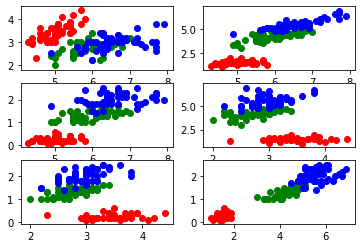

In [13]:
#实验数据可视化 判断是否适用于kmeans算法
import matplotlib.pyplot as plt

def plot_features(a,b):
    plt.scatter(iris.data[:50,a],iris.data[:50,b],c='r')
    plt.scatter(iris.data[50:100,a],iris.data[50:100,b],c='g')
    plt.scatter(iris.data[100:150,a],iris.data[100:150,b],c='b')
    
plt.subplot(321)
plot_features(0,1)

plt.subplot(322)
plot_features(0,2)

plt.subplot(323)
plot_features(0,3)

plt.subplot(324)
plot_features(1,2)

plt.subplot(325)
plot_features(1,3)

plt.subplot(326)
plot_features(2,3)

plt.show()

In [3]:
class PCA():
    def __init__(self,m):
        self.m = m
        
        
    def Transform(self,dataset):
        self.average = np.mean(dataset,0)
        self.varin = np.cov(dataset.T)
        print('样本数据集的均值：\n',self.average)
        print('样本数据集的协方差：\n',self.varin)
        
        [eigvals,eigvecs] = np.linalg.eig(self.varin)
        
        for i in range(eigvals.size):
            indice = i
            for j in range(eigvals.size):
                if j > i:
                    if eigvals[j] > eigvals[indice]:
                        indice = j
                        
            eigvals[i],eigvals[indice] = eigvals[indice],eigvals[i]
            eigvecs[:,i],eigvecs[:,indice] = eigvecs[:,indice],eigvecs[:,i]
        
        self.eigvals = eigvals
        self.eigvecs = eigvecs
        
        print('协方差矩阵的特征值：',self.eigvals)
        print('协方差矩阵的特征向量：\n',self.eigvecs)
        
        NewFeature = dataset @ self.eigvecs
        Y = NewFeature[:,0:self.m]
        return Y 

In [10]:
pca1 = PCA(2)
new_features = pca1.Transform(dataset)

样本数据集的均值：
 [5.84333333 3.05733333 3.758      1.19933333]
样本数据集的协方差：
 [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
协方差矩阵的特征值： [4.22824171 0.24267075 0.0782095  0.02383509]
协方差矩阵的特征向量：
 [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


<function matplotlib.pyplot.show(*args, **kw)>

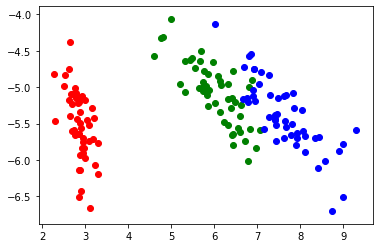

In [12]:
import matplotlib.pyplot as plt

plt.scatter(new_features[:50,0],new_features[:50,1],c='r')
plt.scatter(new_features[50:100,0],new_features[50:100,1],c='g')
plt.scatter(new_features[100:150,0],new_features[100:150,1],c='b')
plt.show